In [1]:
import numpy as np
import seaborn

import ginsim
import biolqm
import maboss
from itertools import combinations # for iterating over sets
import matplotlib.pyplot as plt # for modifying plots
import pandas as pd # for the visualization of lists of states
import pydot

import os

from tools import load_trajs, draw_graph_from_pandas, compute_circuits, compute_stg_counts

In [2]:
path = "../config/cell_cycle/boolean_network/"

In [3]:
bnd_file = path + "intracellular_model.bnd"
cfg_file = path + "intracellular_model.cfg"

masim = maboss.load(bnd_file, cfg_file)

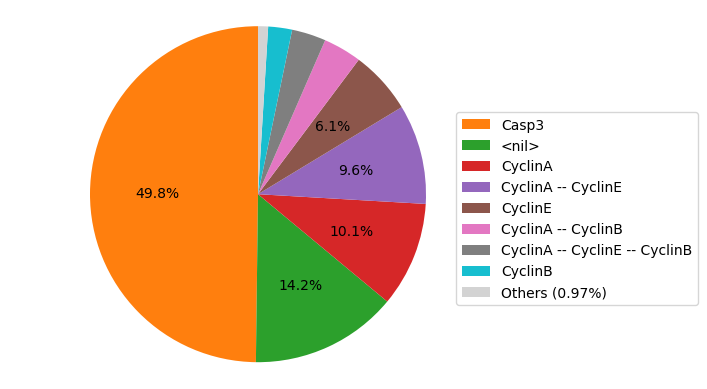

In [4]:
#Wild type

sim = masim.copy()

outputs = [ "Cdh1", "Cdc20"]

cyclins = ["CyclinA", "CyclinB", "CyclinE", "Casp3"]

sim.network.set_output(cyclins)

model = sim.run()

model.plot_piechart()

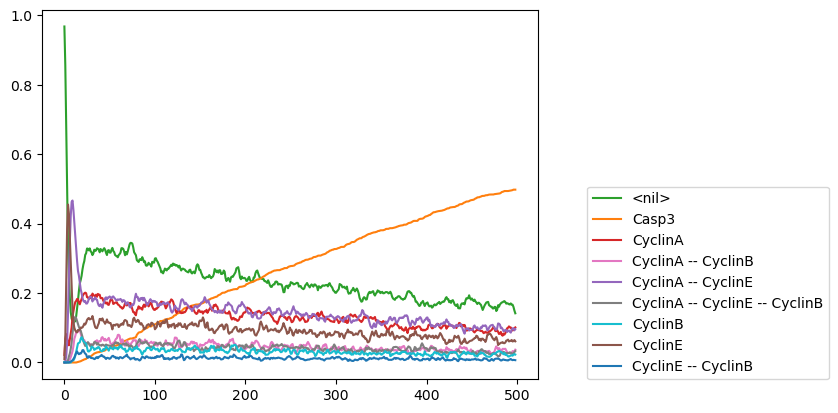

In [5]:
model.plot_trajectory()

In [6]:
## Discrete time
WT_phenotypes_discrete = sim.copy()
WT_phenotypes_discrete.update_parameters(time_tick=1, max_time=40, sample_count=100000)

In [7]:
%time res_discrete = WT_phenotypes_discrete.run()

CPU times: user 5.2 ms, sys: 484 µs, total: 5.69 ms
Wall time: 31.7 s


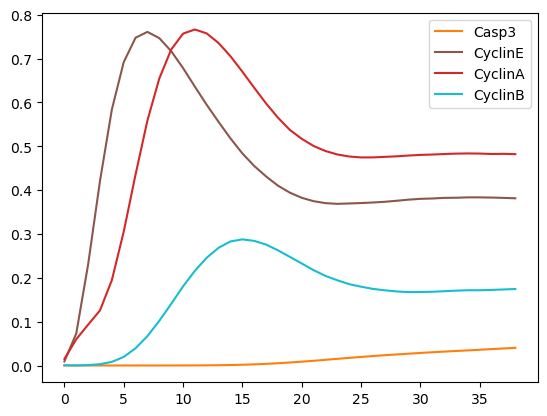

In [8]:
res_discrete.plot_node_trajectory()

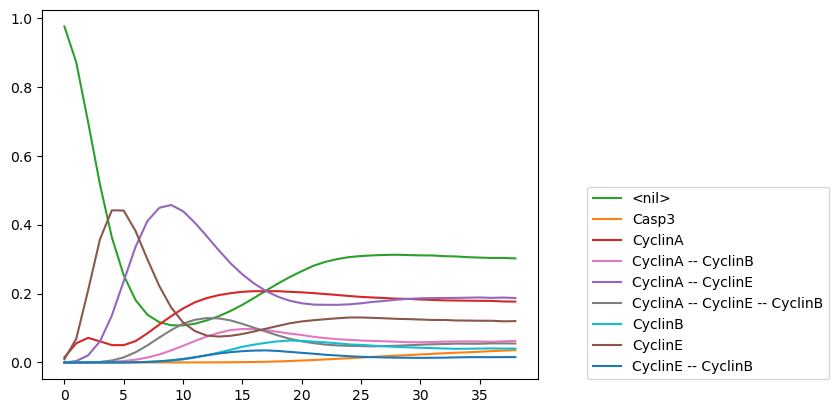

In [9]:
res_discrete.plot_trajectory()

# Analysis of the model for PhysiBoSS with phenotypes output

In [10]:
bnd_file = path + "intracellular_model.bnd"
cfg_file = path + "intracellular_model.cfg"

sim_phenotypes = maboss.load(bnd_file, cfg_file)

In [11]:
WT_phenotypes = sim_phenotypes.copy()
WT_phenotypes.update_parameters( time_tick=1, max_time=30)
WT_result = WT_phenotypes.run()

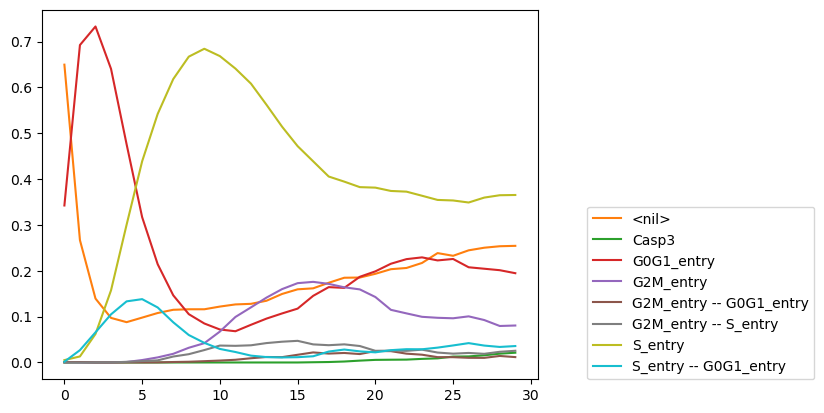

In [12]:
WT_result.plot_trajectory()

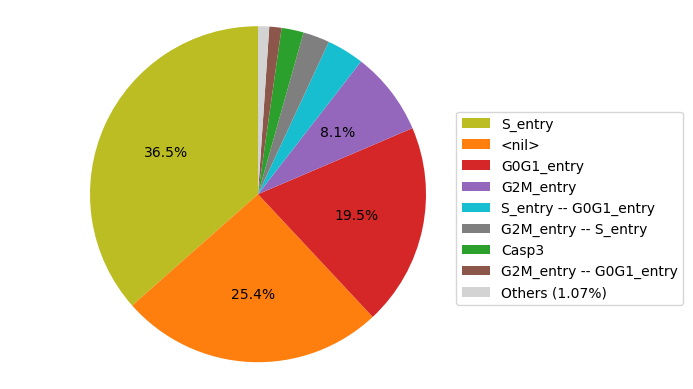

In [13]:
WT_result.plot_piechart()

CPU times: user 10.5 ms, sys: 31.5 ms, total: 42 ms
Wall time: 290 ms


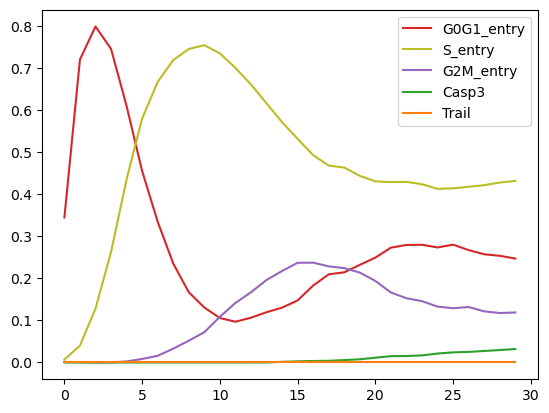

In [14]:
%time res = WT_phenotypes.run()
res.plot_node_trajectory()

In [15]:
## Discrete time
WT_phenotypes_discrete = WT_phenotypes.copy()
WT_phenotypes_discrete.update_parameters(discrete_time=1, time_tick=0.2, max_time=20)

cyclins = ["CyclinA", "CyclinB", "CyclinE", "CyclinD1"]

WT_phenotypes_discrete.network.set_output(cyclins)

In [16]:
%time res_discrete = WT_phenotypes_discrete.run()

CPU times: user 2.12 ms, sys: 3.28 ms, total: 5.41 ms
Wall time: 185 ms


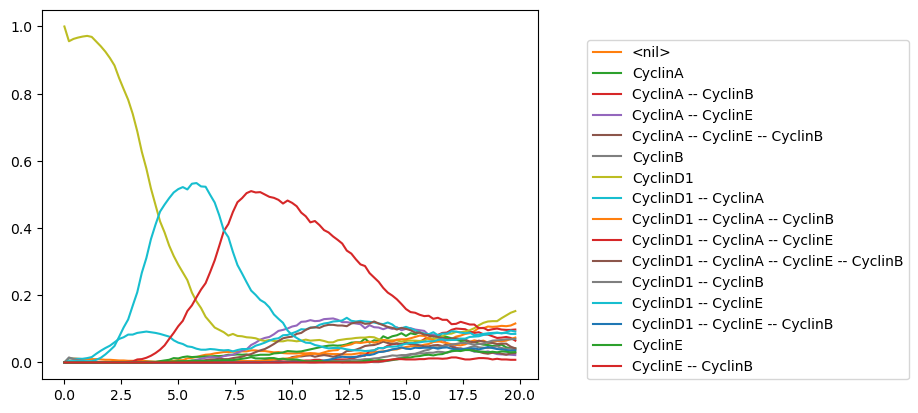

In [17]:
res_discrete.plot_trajectory()

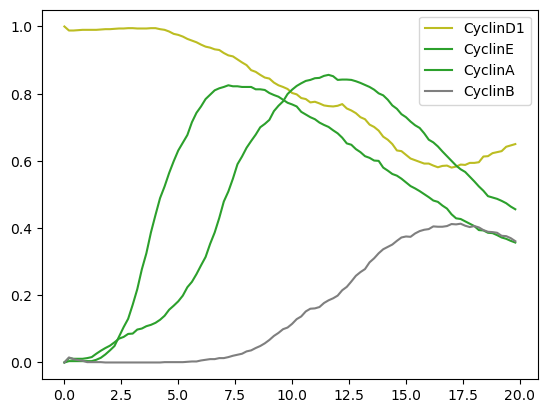

In [18]:
res_discrete.plot_node_trajectory()

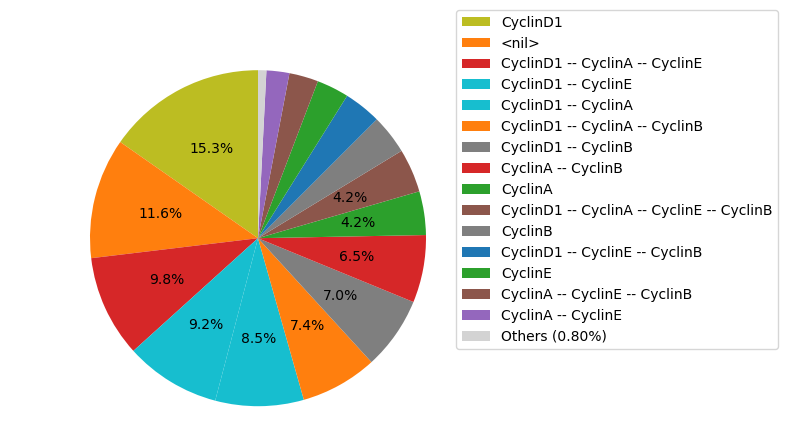

In [19]:
res_discrete.plot_piechart()

CPU times: user 2.02 ms, sys: 3.24 ms, total: 5.26 ms
Wall time: 185 ms


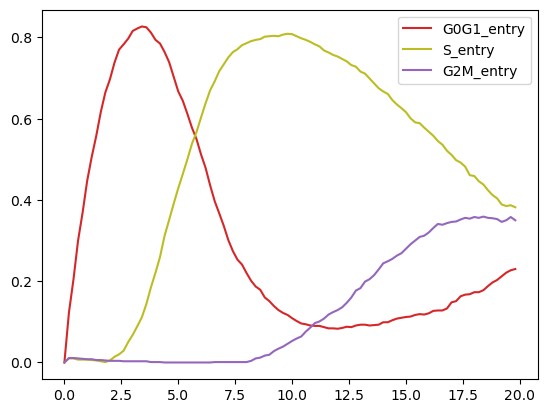

In [20]:
outputs_phenotype = ["G0G1_entry", "G2M_entry", "S_entry"]
WT_phenotypes_discrete.network.set_output(outputs_phenotype)

%time res_discrete = WT_phenotypes_discrete.run()
res_discrete.plot_node_trajectory()

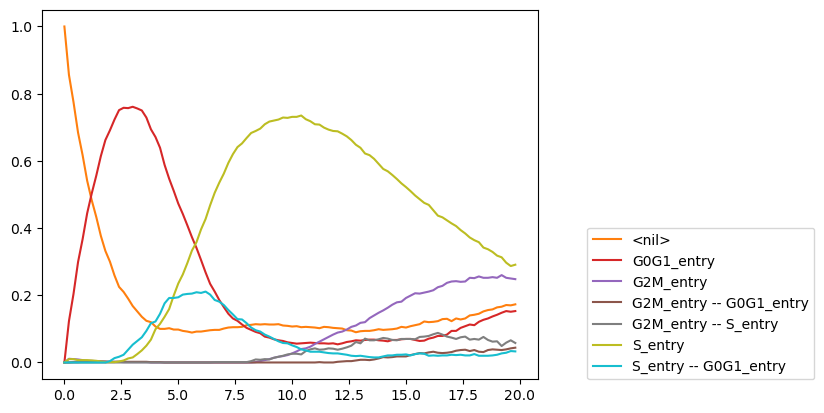

In [21]:
res_discrete.plot_trajectory()

In [22]:
WT_phenotypes_trajs = WT_phenotypes.copy()
WT_phenotypes_trajs.update_parameters(display_traj=1, thread_count=1)

In [23]:
%time res_trajs = WT_phenotypes_trajs.run()

CPU times: user 3.13 ms, sys: 0 ns, total: 3.13 ms
Wall time: 2.6 s


In [24]:
outputs = ["CyclinA", "CyclinB", "CyclinE", "CyclinD1"]
outputs_phenotype = ["G0G1_entry", "G2M_entry", "S_entry"]#, "Casp3"]
trajs, all_states = load_trajs(res_trajs._path, outputs_phenotype, )
stg_counts, state_ids, ids_state = compute_stg_counts(trajs, all_states)

In [25]:
data = pd.DataFrame(
    data=stg_counts,
    index=state_ids.keys(), columns=state_ids.keys()
)
data

,<nil>,G0G1_entry,G0G1_entry -- G2M_entry,G0G1_entry -- S_entry,G2M_entry,G2M_entry -- S_entry,S_entry
<nil>,0.0,1558.0,0.0,0.0,2.0,0.0,7.0
G0G1_entry,265.0,0.0,0.0,1434.0,0.0,0.0,0.0
G0G1_entry -- G2M_entry,0.0,327.0,0.0,0.0,6.0,0.0,0.0
G0G1_entry -- S_entry,0.0,8.0,0.0,0.0,0.0,0.0,1391.0
G2M_entry,301.0,0.0,344.0,0.0,0.0,0.0,0.0
G2M_entry -- S_entry,0.0,0.0,0.0,0.0,722.0,0.0,27.0
S_entry,273.0,0.0,0.0,0.0,0.0,775.0,0.0


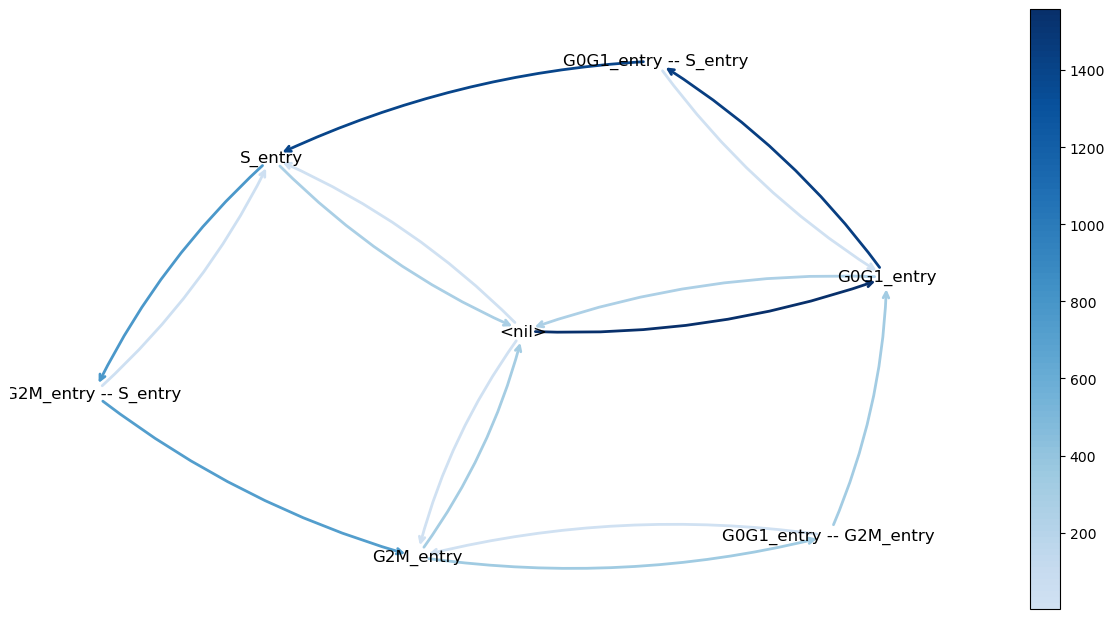

In [26]:
draw_graph_from_pandas(data)

In [27]:
probas = pd.DataFrame(
    data=np.divide(stg_counts,stg_counts.sum(axis=1)[:, np.newaxis]), 
    index=state_ids.keys(), columns=state_ids.keys()
)
probas

,<nil>,G0G1_entry,G0G1_entry -- G2M_entry,G0G1_entry -- S_entry,G2M_entry,G2M_entry -- S_entry,S_entry
<nil>,0.000000,0.994257,0.000000,0.000000,0.001276,0.000000,0.004467
G0G1_entry,0.155974,0.000000,0.000000,0.844026,0.000000,0.000000,0.000000
G0G1_entry -- G2M_entry,0.000000,0.981982,0.000000,0.000000,0.018018,0.000000,0.000000
G0G1_entry -- S_entry,0.000000,0.005718,0.000000,0.000000,0.000000,0.000000,0.994282
G2M_entry,0.466667,0.000000,0.533333,0.000000,0.000000,0.000000,0.000000
G2M_entry -- S_entry,0.000000,0.000000,0.000000,0.000000,0.963952,0.000000,0.036048
S_entry,0.260496,0.000000,0.000000,0.000000,0.000000,0.739504,0.000000


In [28]:
%time paths_dict = compute_circuits(probas, ids_state, '<nil>', 0)

CPU times: user 7.88 ms, sys: 0 ns, total: 7.88 ms
Wall time: 7.83 ms


In [29]:
for proba in sorted(paths_dict, reverse=True):
    #if proba > 0.01:
    print("%.2f : %s" % (proba, paths_dict[proba]))

0.28 : ['<nil>', 'G0G1_entry', 'G0G1_entry -- S_entry', 'S_entry', 'G2M_entry -- S_entry', 'G2M_entry']
0.22 : ['<nil>', 'G0G1_entry', 'G0G1_entry -- S_entry', 'S_entry']
0.16 : ['<nil>', 'G0G1_entry']
0.00 : ['<nil>', 'S_entry', 'G2M_entry -- S_entry', 'G2M_entry']
0.00 : ['<nil>', 'S_entry']
0.00 : ['<nil>', 'G2M_entry']
0.00 : ['<nil>', 'S_entry', 'G2M_entry -- S_entry', 'G2M_entry', 'G0G1_entry -- G2M_entry', 'G0G1_entry']
0.00 : ['<nil>', 'G2M_entry', 'G0G1_entry -- G2M_entry', 'G0G1_entry', 'G0G1_entry -- S_entry', 'S_entry']
0.00 : ['<nil>', 'G2M_entry', 'G0G1_entry -- G2M_entry', 'G0G1_entry']


# Analysis mutants

Text(0.5, 1.0, 'Plk1 mutant')

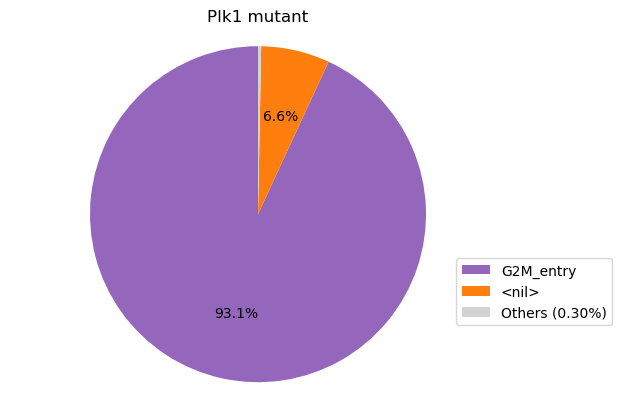

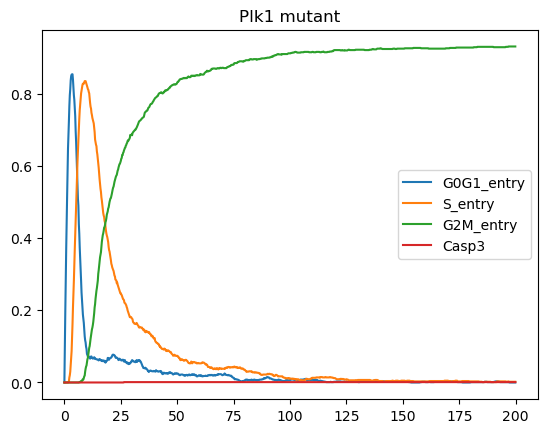

In [30]:
mut_Plk1_OFF = WT_phenotypes_discrete.copy()

outputs_phenotype = ["G0G1_entry", "G2M_entry", "S_entry", "Casp3"]
mut_Plk1_OFF.network.set_output(outputs_phenotype)
mut_Plk1_OFF.update_parameters(max_time=200)
mut_Plk1_OFF.mutate("Plk1", "OFF")
mutres_Plk1_OFF = mut_Plk1_OFF.run()
mutres_Plk1_OFF.plot_piechart()
plt.title('Plk1 mutant')
mutres_Plk1_OFF.get_nodes_probtraj().plot(legend=True)
plt.title('Plk1 mutant')

Text(0.5, 1.0, 'PI3K mutant')

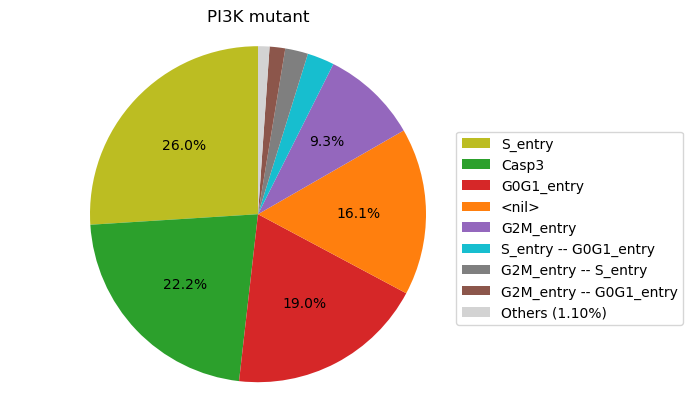

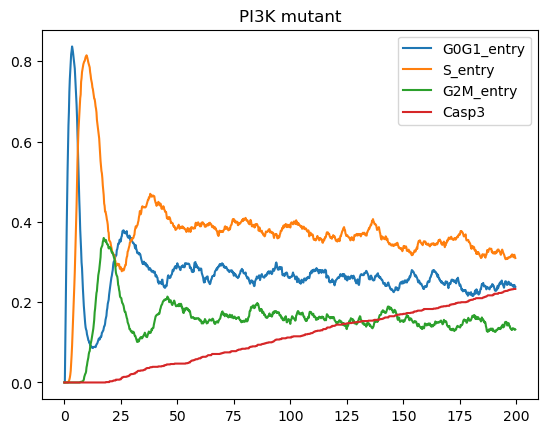

In [31]:
mut_PI3K_ON = WT_phenotypes_discrete.copy()

outputs_phenotype = ["G0G1_entry", "G2M_entry", "S_entry", "Casp3"]
mut_PI3K_ON.network.set_output(outputs_phenotype)
mut_PI3K_ON.update_parameters(max_time=200)
mut_PI3K_ON.mutate("PI3K_H", "ON")
mutres_PI3K_ON = mut_PI3K_ON.run()
mutres_PI3K_ON.plot_piechart()
plt.title('PI3K mutant')
mutres_PI3K_ON.get_nodes_probtraj().plot(legend=True)
plt.title('PI3K mutant')

Text(0.5, 1.0, 'PI3K and p110 mutant')

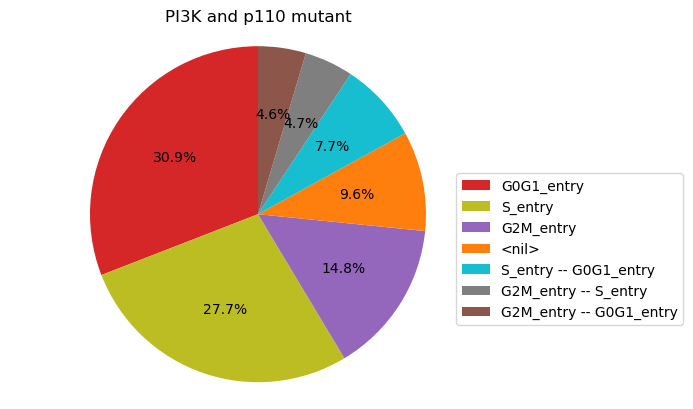

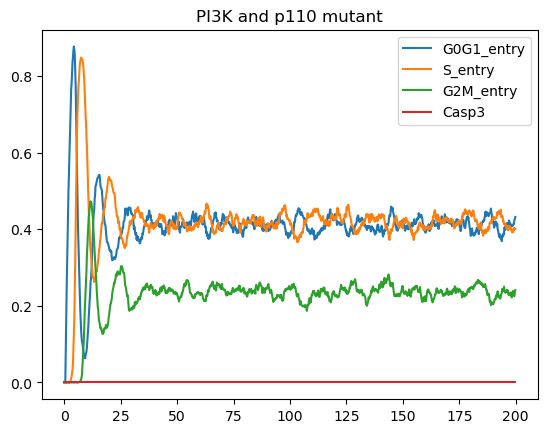

In [32]:
mut_PI3K_p110_ON = mut_PI3K_ON.copy()
mut_PI3K_p110_ON.mutate("p110_H", "ON")
mutres_PI3K_p110_ON = mut_PI3K_p110_ON.run()
mutres_PI3K_p110_ON.plot_piechart()
plt.title('PI3K and p110 mutant')
mutres_PI3K_p110_ON.get_nodes_probtraj().plot(legend=True)
plt.title('PI3K and p110 mutant')

Text(0.5, 1.0, 'FoxO3 mutant')

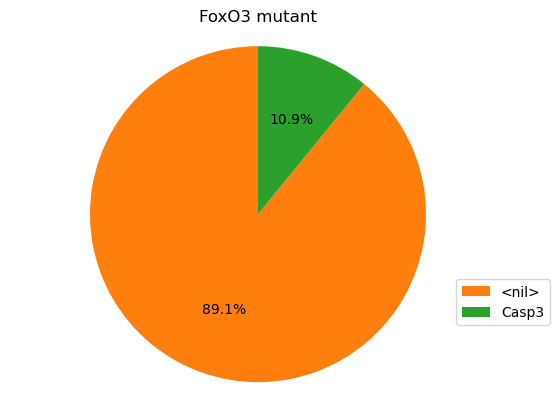

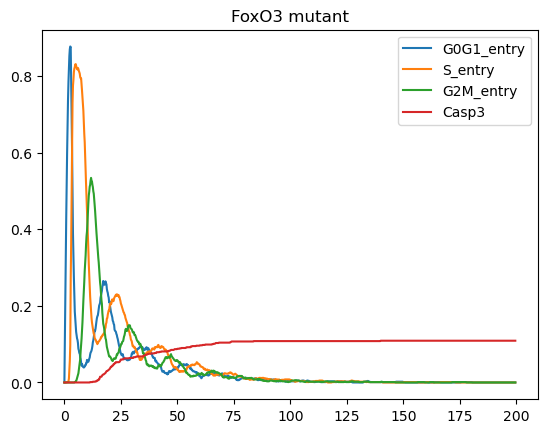

In [33]:
mut_FoxO3_OFF = WT_phenotypes_discrete.copy()

outputs_phenotype = ["G0G1_entry", "G2M_entry", "S_entry", "Casp3"]
mut_FoxO3_OFF.network.set_output(outputs_phenotype)
mut_FoxO3_OFF.update_parameters(max_time=200)
mut_FoxO3_OFF.mutate("FoxO3", "OFF")
mutres_FoxO3_OFF = mut_FoxO3_OFF.run()
mutres_FoxO3_OFF.plot_piechart()
plt.title('FoxO3 mutant')
mutres_FoxO3_OFF.get_nodes_probtraj().plot(legend=True)
plt.title('FoxO3 mutant')